# Reducing the number of high fatality accidents

## 📖 Background
You work for the road safety team within the department of transport and are looking into how they can reduce the number of major incidents. The safety team classes major incidents as fatal accidents involving 3+ casualties. They are trying to learn more about the characteristics of these major incidents so they can brainstorm interventions that could lower the number of deaths. They have asked for your assistance with answering a number of questions.

## 💾 The data
The reporting department have been collecting data on every accident that is reported. They've included this along with a lookup file for 2020's accidents.

*Published by the department for transport. https://data.gov.uk/dataset/road-accidents-safety-data* 
*Contains public sector information licensed under the Open Government Licence v3.0.*

## 💪 Competition challenge

Create a report that covers the following:

1. What time of day and day of the week do most major incidents happen?
2. Are there any patterns in the time of day/ day of the week when major incidents occur?
3. What characteristics stand out in major incidents compared with other accidents?
4. On what areas would you recommend the planning team focus their brainstorming efforts to reduce major incidents?

In [401]:
# Data Manipulation
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Configurations
sns.set_style('darkgrid')


In [402]:
df_accidents = pd.read_csv(r'./data/accident-data.csv')
df_accidents.head()

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,...,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area
0,2020010219808,2020,10219808,-0.254001,51.462262,3,1,1,04/02/2020,3,...,6,0,9,9,1,9,9,0,0,1
1,2020010220496,2020,10220496,-0.139253,51.470327,3,1,2,27/04/2020,2,...,6,0,0,4,1,1,1,0,0,1
2,2020010228005,2020,10228005,-0.178719,51.529614,3,1,1,01/01/2020,4,...,6,0,0,0,4,1,2,0,0,1
3,2020010228006,2020,10228006,-0.001683,51.541210,2,1,1,01/01/2020,4,...,6,0,0,4,4,1,1,0,0,1
4,2020010228011,2020,10228011,-0.137592,51.515704,3,1,2,01/01/2020,4,...,5,0,0,0,4,1,1,0,0,1


# Verifying Datatypes and missing values

In [403]:
df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   accident_index                           91199 non-null  object 
 1   accident_year                            91199 non-null  int64  
 2   accident_reference                       91199 non-null  object 
 3   longitude                                91185 non-null  float64
 4   latitude                                 91185 non-null  float64
 5   accident_severity                        91199 non-null  int64  
 6   number_of_vehicles                       91199 non-null  int64  
 7   number_of_casualties                     91199 non-null  int64  
 8   date                                     91199 non-null  object 
 9   day_of_week                              91199 non-null  int64  
 10  time                                     91199

In [404]:
# Change 'date' type (object) to datetime64[ns]
# change 'time' type (object) to timedelta
df_accidents['date'] = df_accidents['date'].astype('datetime64[ns]')
df_accidents['time'] = pd.to_timedelta( df_accidents['time'] + ':00' )

In [405]:
df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype          
---  ------                                   --------------  -----          
 0   accident_index                           91199 non-null  object         
 1   accident_year                            91199 non-null  int64          
 2   accident_reference                       91199 non-null  object         
 3   longitude                                91185 non-null  float64        
 4   latitude                                 91185 non-null  float64        
 5   accident_severity                        91199 non-null  int64          
 6   number_of_vehicles                       91199 non-null  int64          
 7   number_of_casualties                     91199 non-null  int64          
 8   date                                     91199 non-null  datetime64[ns] 
 9   day_of_week                 

In [406]:
# df_accidents['accident_reference'].astype(int)
df_accidents[ df_accidents['accident_reference'].isin(['01T246170']) ]

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,...,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area
20905,202001T246170,2020,01T246170,-0.07885,51.520359,3,2,2,2020-04-24,6,...,5,0,9,9,1,9,9,9,9,1


# Thoughts

So far,there is no NA data in the dataset. In addition, we converted two columns to their correct data type. Accident_index and Accident_reference are not numeric because there are alphabet characters in the string. 

# Next Steps

Initially, I want to analysis the day and time the accidents are occuring. From there, we can build up to what type of accidents are occuring on those dates. 

In [407]:
df_accidents_timestamp = df_accidents[ ['accident_year','date','time','day_of_week'] ]

df_accidents_timestamp


,accident_year,date,time,day_of_week
0,2020,2020-04-02,0 days 09:00:00,3
1,2020,2020-04-27,0 days 13:55:00,2
2,2020,2020-01-01,0 days 01:25:00,4
3,2020,2020-01-01,0 days 01:50:00,4
4,2020,2020-01-01,0 days 02:25:00,4
...,...,...,...,...
91194,2020,2020-12-08,0 days 14:30:00,4
91195,2020,2020-11-13,0 days 15:05:00,6
91196,2020,2020-04-15,0 days 12:42:00,4
91197,2020,2020-12-15,0 days 14:00:00,3


In [408]:
Day_Name = {1:'Sunday',
       2:'Monday',
       3:'Tuesday',
       4:'Wednesday',
       5:'Thursday',
       6:'Friday',
       7:'Saturday'}

In [409]:
df_accidents_timestamp['accident_year'].unique()

array([2020])

In [410]:
# dt.month_name()
#df_accidents_timestamp['date'].dt.day_name()

df_accidents_timestamp['Month'] = df_accidents_timestamp['date'].dt.month_name() 
df_accidents_timestamp['Day_Name'] = df_accidents_timestamp['day_of_week'].apply( lambda x: Day_Name[x] )

/var/folders/_6/jplnpf590f180r_srq2j11zm0000gn/T/ipykernel_33519/1208584235.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accidents_timestamp['Month'] = df_accidents_timestamp['date'].dt.month_name()
/var/folders/_6/jplnpf590f180r_srq2j11zm0000gn/T/ipykernel_33519/1208584235.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accidents_timestamp['Day_Name'] = df_accidents_timestamp['day_of_week'].apply( lambda x: Day_Name[x] )


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

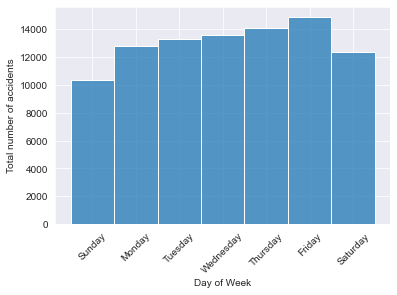

In [411]:
# Create histogram for day of week

sns.histplot(x = 'Day_Name', data = df_accidents_timestamp.sort_values(by='day_of_week'))

plt.ylabel('Total number of accidents')
plt.xlabel('Day of Week')

plt.xticks( rotation = 45 )


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

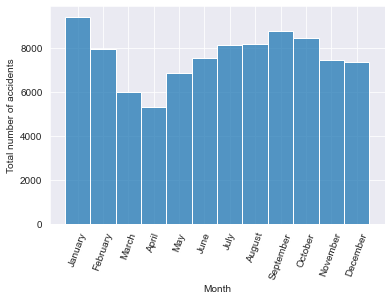

In [412]:
# Create histogram for day of week
sns.histplot(x = 'Month', data = df_accidents_timestamp.sort_values(by='date') )

plt.ylabel('Total number of accidents')
plt.xlabel('Month')

plt.xticks( rotation = 70 )


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

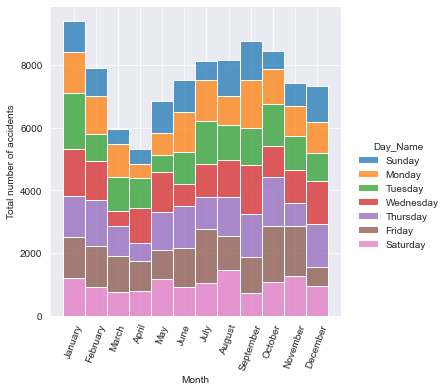

In [413]:
sns.displot(x = 'Month', 
            data = df_accidents_timestamp.sort_values(by='date'),
            kind = 'hist',
            hue ='Day_Name' , 
            hue_order= list( Day_Name.values()),
            multiple ='stack' )

plt.ylabel('Total number of accidents')
plt.xlabel('Month')

plt.xticks( rotation = 70 )

In [414]:
df_temp = df_accidents_timestamp[['Month','Day_Name']].value_counts().reset_index()

df_temp = df_temp.rename(columns = {0:'count'})

df_temp

,Month,Day_Name,count
0,October,Friday,1790
1,January,Tuesday,1777
2,July,Friday,1734
3,November,Friday,1584
4,September,Wednesday,1574
...,...,...,...
79,May,Tuesday,546
80,April,Sunday,477
81,March,Sunday,475
82,March,Wednesday,474


In [415]:
#sns.relplot(x = 'Month' , y = 'count', data = df_temp, kind='line' , hue = 'Day_Name')

#plt.xticks( rotation = 70 )
